<h1><center> Optimisation des Primes d'Assurance : Sélection des Meilleurs Modèles pour la Prédiction de la Fréquence et du Coût des Sinistres </center></h1>

Après avoir développé quatre modèles distincts pour prédire la fréquence des sinistres corporels et matériels, ainsi que le coût des sinistres matériels et corporels, nous avons exploré un éventail de méthodes issues du machine learning et du deep learning. Dans le cadre de ce code, nous avons procédé à la sélection des meilleurs modèles basée sur leur performance supérieure. L'objectif final est de calculer les primes corporelles et matérielles en utilisant le produit du coût par la fréquence des sinistres, ce qui nous permet de déterminer avec précision le montant des primes à appliquer

# Table des matières :

* [1 - Initialisation de l'étude](#initialisation)
* [2 - Retraitements des données](#retraitements)
* [3 - Modèles de Machine Learning](#Modèles)
* [ 4- Prime](#Modèles)



In [41]:
# Librairies :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score, r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Import des données :
df = pd.read_csv("training_clean.csv")
#df_pricing = pd.read_csv("pricing.csv")

df.head()

,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Value,Adind,SubGroup2,Group2,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
0,200114978,2009,Male,C,Large,Employed,25,18,85,3,15080.0,0,L46,L,72.012883,365.0,1,0,0.0,0.0
1,200114994,2009,Male,E,Large,Employed,20,11,30,2,22370.0,1,O38,O,39.550411,365.0,1,0,0.0,0.0
2,200115001,2009,Female,E,Large,Unemployed,42,11,85,0,39650.0,0,Q28,Q,169.529148,365.0,2,0,0.0,0.0
3,200115011,2009,Female,C,Medium,Housewife,21,5,0,0,12600.0,1,L6,L,58.894688,365.0,1,0,0.0,0.0
4,200115015,2009,Female,D,Large,Employed,33,12,30,10,9065.0,0,N4,N,109.631885,365.0,2,0,0.0,0.0


In [51]:
df.describe()

,PolNum,CalYear,Age,Group1,Bonus,Poldur,Value,Adind,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi,Age_Bonus
count,9.995800e+04,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000,99958.000000
mean,2.002003e+08,2009.500040,41.126673,10.691941,-9.381490,5.470728,16358.691375,0.512235,117.140415,349.818049,0.147182,0.046770,106.133042,222.773927,-531.868185
std,6.216544e+04,0.500002,14.300792,4.687460,42.478085,4.591028,10254.022150,0.499853,79.491485,26.021651,0.436633,0.219509,445.023870,1859.903191,1866.133334
min,2.001149e+08,2009.000000,18.000000,1.000000,-50.000000,0.000000,1000.000000,0.000000,14.377142,302.500000,0.000000,0.000000,0.000000,0.000000,-3750.000000
25%,2.001399e+08,2009.000000,30.000000,7.000000,-40.000000,1.000000,8376.250000,0.000000,50.566406,340.000000,0.000000,0.000000,0.000000,0.000000,-1900.000000
50%,2.002358e+08,2010.000000,40.000000,11.000000,-30.000000,4.000000,14605.000000,1.000000,94.364623,365.000000,0.000000,0.000000,0.000000,0.000000,-930.000000
75%,2.002608e+08,2010.000000,51.000000,14.000000,10.000000,9.000000,22565.000000,1.000000,174.644525,365.000000,0.000000,0.000000,0.000000,0.000000,380.000000
max,2.002858e+08,2010.000000,75.000000,20.000000,85.000000,15.000000,43842.500000,1.000000,297.385170,365.000000,7.000000,3.000000,12878.369910,69068.026292,6375.000000


# 2- Retraitements  

In [4]:
df=df.iloc[21:]


In [5]:
bins = [18, 25, 40, 60, 100]   
labels = ['18-24', '25-39', '40-59', '60+']  # Les labels correspondent aux tranches d'âge

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_Bonus'] = df['Age'] * df['Bonus']

# Vérifier le résultat
df[['Age', 'AgeGroup']].head()
grouped_counts = df.groupby('AgeGroup')['Numtpbi'].value_counts().unstack(fill_value=0)

print(grouped_counts)

Numtpbi       0     1   2  3
AgeGroup                    
18-24     11924  1209  76  2
25-39     34538  1695  56  2
40-59     36733  1160  27  2
60+       12262   269   3  0


/tmp/ipykernel_832/1466526461.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('AgeGroup')['Numtpbi'].value_counts().unstack(fill_value=0)


In [89]:
numeric_features = ['Age','Bonus', 'Indtpbi']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Occupation','Type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Modèle Frequence corporel

In [90]:
# Split the data into features and target variable
X = df[['Gender', 'Occupation', 'Age', 'Bonus', 'Type','Indtpbi']]
y = df['Numtpbi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:

model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])
param_grid_rf = {
    'regressor__n_estimators': [10, 50, 100],  # Nombre d'arbres
    'regressor__max_depth': [None, 10, 20],  # Profondeur maximale des arbres
    'regressor__min_samples_split': [2, 4],  # Nombre minimal d'échantillons requis pour diviser un nœud interne
    'regressor__min_samples_leaf': [1, 2]  # Nombre minimal d'échantillons requis pour être au niveau d'un nœud feuille
}

# Configuration et exécution de la recherche sur grille
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
# Affichage des meilleurs paramètres et du meilleur score R²
print("Meilleurs paramètres trouvés pour la forêt aléatoire:", grid_search_rf.best_params_)
print("Meilleur score R² pour la forêt aléatoire:", grid_search_rf.best_score_)

Meilleurs paramètres trouvés pour la forêt aléatoire: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Meilleur score R² pour la forêt aléatoire: 0.9604793594045535


In [94]:
dump(model_rf, 'model_frequence_corporel.joblib')

print("Le modèle a été sauvegardé avec succès.")

Le modèle a été sauvegardé avec succès.


# Modèle fréquence des sinistres matériels


In [85]:
numeric_features = ['Age','Bonus', 'Indtppd']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Occupation','Type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [86]:
# Split the data into features and target variable
X_fm = df[['Gender', 'Occupation', 'Age','Bonus', 'Type','Indtppd']]
y_fm = df['Numtppd']

# Split the data into training and testing sets
X_train_rfm, X_test_rfm, y_train_rfm, y_test_rfm = train_test_split(X_fm, y_fm, test_size=0.2, random_state=42)


In [87]:
# Modèle fréquence des sinistres matériels

model_rfm = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])
param_grid_rfm = {
    'regressor__n_estimators': [10, 50, 100],  # Nombre d'arbres
    'regressor__max_depth': [None, 10, 20],  # Profondeur maximale des arbres
    'regressor__min_samples_split': [2, 4],  # Nombre minimal d'échantillons requis pour diviser un nœud interne
    'regressor__min_samples_leaf': [1, 2]  # Nombre minimal d'échantillons requis pour être au niveau d'un nœud feuille
}

# Configuration et exécution de la recherche sur grille
grid_search_rfm = GridSearchCV(model_rfm, param_grid_rfm, cv=3, scoring='r2', n_jobs=-1)
grid_search_rfm.fit(X_train_rfm, y_train_rfm)

best_model_rfm = grid_search_rfm.best_estimator_
y_pred_rfm = best_model_rfm.predict(X_test_rfm)
# Affichage des meilleurs paramètres et du meilleur score R²
print("Meilleurs paramètres trouvés pour la forêt aléatoire:", grid_search_rfm.best_params_)
print("Meilleur score R² pour la forêt aléatoire:", grid_search_rfm.best_score_)



Meilleurs paramètres trouvés pour la forêt aléatoire: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Meilleur score R² pour la forêt aléatoire: 0.8616544610171305


In [93]:
dump(model_rfm, 'model_frequence_materiel.joblib')

print("Le modèle a été sauvegardé avec succès.")

Le modèle a été sauvegardé avec succès.


#### Modèle INDPBI bodily

In [12]:
# List of column names to select
columns_to_select_Ind = ['Gender', 'Type', 'Category', 'Occupation', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 
                         'Numtpbi','Indtppd', 'Numtppd']

# Select the columns and assign them to X
X_Ind = df[columns_to_select_Ind] # features
y_Ind = df["Indtpbi"] # target variable

In [13]:
# Applying a pipeline on categorical and numerical feature
categorical_features = X_Ind.select_dtypes(include=['object', 'bool']).columns
numerical_features = X_Ind.select_dtypes(exclude=['object', 'bool']).columns

In [14]:
# Handling missing data and normalization of numeric data with MAX Abs Scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Replace missing numeric data by the median
    ("scaler", StandardScaler())])  # Normalization of numeric data after imputing for the missing values

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not defined')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Handling missing categorical data

In [15]:
# Define the features preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
# As our target variable can be imbalanced
X_train_Ind, X_test_Ind, y_train_Ind, y_test_Ind = train_test_split(X_Ind, y_Ind, test_size=0.2, random_state=42)

In [17]:
preprocessor.fit(X_train_Ind, y_train_Ind)
X_train_Ind = preprocessor.transform(X_train_Ind)
X_test_Ind = preprocessor.transform(X_test_Ind)

/opt/mamba/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Regression Metrics (with GridSearchCV) (RF_GSCV_Ind):
Mean Squared Error (RF_GSCV_Ind): 2178591.12947806
R-squared Score (RF_GSCV_Ind): 0.33658583328040137
Best parameters found by GridSearchCV (RF_GSCV_Ind):
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 3000}
MAE (RF_GSCV_Ind):
Train_RF_GSCV_Ind: 210.3900577913964
Test_RF_GSCV_Ind: 211.09848515417644
MSE (RF_GSCV_Ind):
Train_RF_GSCV_Ind: 2249618.98920839
Test_RF_GSCV_Ind: 2178591.12947806
RMSE (RF_GSCV_Ind):
Train_RF_GSCV_Ind: 1499.8729910257034
Test_RF_GSCV_Ind: 1476.0051251530465
R2 SCORE (RF_GSCV_Ind):
Train_RF_GSCV_Ind: 0.35780766679424225
Test_RF_GSCV_Ind: 0.33658583328040137
MAPE - Mean Absolute Percentage Error (RF_GSCV_Ind):
Train_RF_GSCV_Ind: 29573.46602783752
Test_RF_GSCV_Ind: 452555.5002164314


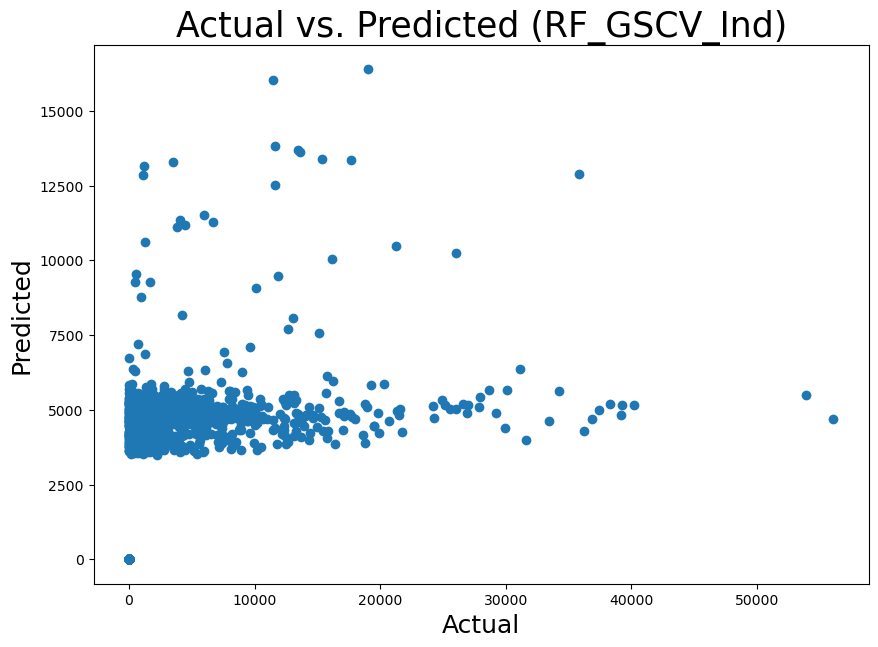

In [18]:
# Define the parameter grid for GridSearchCV
param_grid_RF_GSCV = {
    'n_estimators': [10, 20, 3000],  # Number of trees in the forest
    'max_depth': [None, 1, 5],  # Maximum depth of the tree
    'min_samples_split': [2, 3, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Define the Random Forest regression model for GridSearchCV
rf_model_RF_GSCV = RandomForestRegressor(random_state=42)

# Create GridSearchCV object for Random Forest
grid_search_RF_GSCV = GridSearchCV(estimator=rf_model_RF_GSCV, param_grid=param_grid_RF_GSCV, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search_RF_GSCV.fit(X_train_Ind, y_train_Ind)

# Get the best model
best_rf_model_RF_GSCV = grid_search_RF_GSCV.best_estimator_

# Make predictions
y_pred_rf_grid_Ind = best_rf_model_RF_GSCV.predict(X_test_Ind)

# Evaluate the model
mse_rf_grid_Ind = mean_squared_error(y_test_Ind, y_pred_rf_grid_Ind)
print("Random Forest Regression Metrics (with GridSearchCV) (RF_GSCV_Ind):")
print(f"Mean Squared Error (RF_GSCV_Ind): {mse_rf_grid_Ind}")

r2_rf_grid_Ind = r2_score(y_test_Ind, y_pred_rf_grid_Ind)
print(f"R-squared Score (RF_GSCV_Ind): {r2_rf_grid_Ind}")

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV (RF_GSCV_Ind):")
print(grid_search_RF_GSCV.best_params_)

# Print MAE (Mean Absolute Error)
print("MAE (RF_GSCV_Ind):")
print("Train_RF_GSCV_Ind:", mean_absolute_error(y_train_Ind, best_rf_model_RF_GSCV.predict(X_train_Ind)))
print("Test_RF_GSCV_Ind:", mean_absolute_error(y_test_Ind, y_pred_rf_grid_Ind))
print("====================================")

# Print MSE (Mean Squared Error)
print("MSE (RF_GSCV_Ind):")
print("Train_RF_GSCV_Ind:", mean_squared_error(y_train_Ind, best_rf_model_RF_GSCV.predict(X_train_Ind)))
print("Test_RF_GSCV_Ind:", mse_rf_grid_Ind)
print("====================================")

# Print RMSE (Root Mean Squared Error)
print("RMSE (RF_GSCV_Ind):")
print("Train_RF_GSCV_Ind:", np.sqrt(mean_squared_error(y_train_Ind, best_rf_model_RF_GSCV.predict(X_train_Ind))))
print("Test_RF_GSCV_Ind:", np.sqrt(mse_rf_grid_Ind))
print("====================================")

# Print R2 SCORE
print("R2 SCORE (RF_GSCV_Ind):")
print("Train_RF_GSCV_Ind:", r2_score(y_train_Ind, best_rf_model_RF_GSCV.predict(X_train_Ind)))
print("Test_RF_GSCV_Ind:", r2_rf_grid_Ind)
print("====================================")

# Calculate and print MAPE (Mean Absolute Percentage Error)
mape_train_rf_Ind = np.mean(np.abs((y_train_Ind - best_rf_model_RF_GSCV.predict(X_train_Ind)) / y_train_Ind)) * 100
print("MAPE - Mean Absolute Percentage Error (RF_GSCV_Ind):")
print("Train_RF_GSCV_Ind:", mape_train_rf_Ind)
print("Test_RF_GSCV_Ind:", np.mean(np.abs((y_test_Ind - y_pred_rf_grid_Ind) / y_test_Ind)) * 100)

# Plot actual vs predicted value
plt.figure(figsize=(10, 7))
plt.title("Actual vs. Predicted (RF_GSCV_Ind)", fontsize=25)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test_Ind, y=y_pred_rf_grid_Ind)
plt.show()

In [ ]:
dump(model_rfm, 'model_Numtpbi.joblib')

print("Le modèle a été sauvegardé avec succès.")

#### Modèle Indppd material 

In [19]:
# List of column names to select
columns_to_select_Ind = ['Type', 'Category', 'PolNum', 'CalYear', 'Age', 'Adind', 'Density', 'Bonus', 'Exppdays', 'Group1',
                     'Numtpbi', 'Indtpbi', 'Numtppd']


# Select the columns and assign them to X
X_Ind_ppd = df[columns_to_select_Ind] # features
y_Ind_ppd = df["Indtppd"] # target variable

In [20]:
# Applying a pipeline on categorical and numerical feature
categorical_features = X_Ind_ppd.select_dtypes(include=['object', 'bool']).columns
numerical_features = X_Ind_ppd.select_dtypes(exclude=['object', 'bool']).columns

In [21]:
# Handling missing data and normalization of numeric data with MAX Abs Scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Replace missing numeric data by the median
    ("scaler", StandardScaler())])  # Normalization of numeric data after imputing for the missing values

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not defined')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Handling missing categorical data

In [22]:
# Define the features preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# As our target variable can be imbalanced
X_train_Ind_ppd, X_test_Ind_ppd, y_train_Ind_ppd, y_test_Ind_ppd = train_test_split(X_Ind_ppd, y_Ind_ppd, test_size=0.2, random_state=42)

In [24]:
preprocessor.fit(X_train_Ind_ppd, y_train_Ind_ppd)
X_train_Ind_ppd = preprocessor.transform(X_train_Ind_ppd)
X_test_Ind_ppd = preprocessor.transform(X_test_Ind_ppd)

Random Forest Regression Metrics (with GridSearchCV) (RF_GSCV_Ind_ppd):
Mean Squared Error (RF_GSCV_Ind_ppd): 89029.28516357667
R-squared Score (RF_GSCV_Ind_ppd): 0.545527957259114
Best parameters found by GridSearchCV (RF_GSCV_Ind_ppd):
{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 1000}
MAE (RF_GSCV_Ind_ppd):
Train_RF_GSCV_Ind_ppd: 66.7834104938854
Test_RF_GSCV_Ind_ppd: 75.11130873198049
MSE (RF_GSCV_Ind_ppd):
Train_RF_GSCV_Ind_ppd: 75569.33412006278
Test_RF_GSCV_Ind_ppd: 89029.28516357667
RMSE (RF_GSCV_Ind_ppd):
Train_RF_GSCV_Ind_ppd: 274.89877067761284
Test_RF_GSCV_Ind_ppd: 298.37775581228686
R2 SCORE (RF_GSCV_Ind_ppd):
Train_RF_GSCV_Ind_ppd: 0.6194525687774528
Test_RF_GSCV_Ind_ppd: 0.545527957259114
MAPE - Mean Absolute Percentage Error (RF_GSCV_Ind_ppd):
Train_RF_GSCV_Ind_ppd: 620.4331978398826
Test_RF_GSCV_Ind_ppd: 512.310507816396


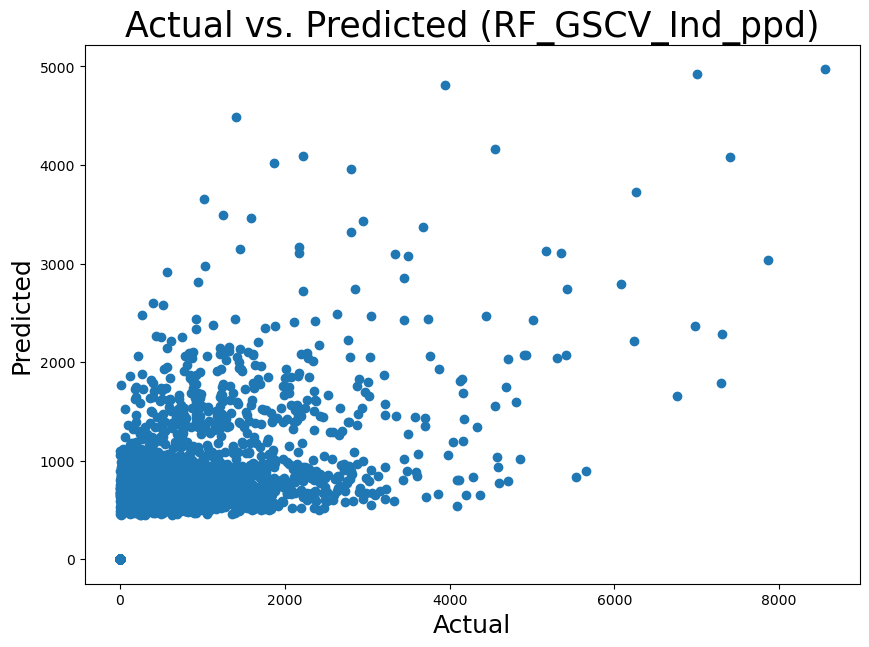

In [25]:
# Define the parameter grid for GridSearchCV
param_grid_RF_GSCV_ppd = {
    'n_estimators': [1000, 20, 30],  # Number of trees in the forest
    'max_depth': [None, 1, 10],  # Maximum depth of the tree
    'min_samples_split': [30, 20, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required at each leaf node
}

# Define the Random Forest regression model for GridSearchCV
rf_model_RF_GSCV_ppd = RandomForestRegressor(random_state=42)

# Create GridSearchCV object for Random Forest
grid_search_RF_GSCV_ppd = GridSearchCV(estimator=rf_model_RF_GSCV_ppd, param_grid=param_grid_RF_GSCV_ppd, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search_RF_GSCV_ppd.fit(X_train_Ind_ppd, y_train_Ind_ppd)

# Get the best model
best_rf_model_RF_GSCV_ppd = grid_search_RF_GSCV_ppd.best_estimator_

# Make predictions
y_pred_rf_grid_Ind_ppd = best_rf_model_RF_GSCV_ppd.predict(X_test_Ind_ppd)

# Evaluate the model
mse_rf_grid_Ind_ppd = mean_squared_error(y_test_Ind_ppd, y_pred_rf_grid_Ind_ppd)
print("Random Forest Regression Metrics (with GridSearchCV) (RF_GSCV_Ind_ppd):")
print(f"Mean Squared Error (RF_GSCV_Ind_ppd): {mse_rf_grid_Ind_ppd}")

r2_rf_grid_Ind_ppd = r2_score(y_test_Ind_ppd, y_pred_rf_grid_Ind_ppd)
print(f"R-squared Score (RF_GSCV_Ind_ppd): {r2_rf_grid_Ind_ppd}")

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV (RF_GSCV_Ind_ppd):")
print(grid_search_RF_GSCV_ppd.best_params_)

# Print MAE (Mean Absolute Error)
print("MAE (RF_GSCV_Ind_ppd):")
print("Train_RF_GSCV_Ind_ppd:", mean_absolute_error(y_train_Ind_ppd, best_rf_model_RF_GSCV_ppd.predict(X_train_Ind_ppd)))
print("Test_RF_GSCV_Ind_ppd:", mean_absolute_error(y_test_Ind_ppd, y_pred_rf_grid_Ind_ppd))
print("====================================")

# Print MSE (Mean Squared Error)
print("MSE (RF_GSCV_Ind_ppd):")
print("Train_RF_GSCV_Ind_ppd:", mean_squared_error(y_train_Ind_ppd, best_rf_model_RF_GSCV_ppd.predict(X_train_Ind_ppd)))
print("Test_RF_GSCV_Ind_ppd:", mse_rf_grid_Ind_ppd)
print("====================================")

# Print RMSE (Root Mean Squared Error)
print("RMSE (RF_GSCV_Ind_ppd):")
print("Train_RF_GSCV_Ind_ppd:", np.sqrt(mean_squared_error(y_train_Ind_ppd, best_rf_model_RF_GSCV_ppd.predict(X_train_Ind_ppd))))
print("Test_RF_GSCV_Ind_ppd:", np.sqrt(mse_rf_grid_Ind_ppd))
print("====================================")

# Print R2 SCORE
print("R2 SCORE (RF_GSCV_Ind_ppd):")
print("Train_RF_GSCV_Ind_ppd:", r2_score(y_train_Ind_ppd, best_rf_model_RF_GSCV_ppd.predict(X_train_Ind_ppd)))
print("Test_RF_GSCV_Ind_ppd:", r2_rf_grid_Ind_ppd)
print("====================================")

# Calculate and print MAPE (Mean Absolute Percentage Error)
mape_train_rf_Ind_ppd = np.mean(np.abs((y_train_Ind_ppd - best_rf_model_RF_GSCV_ppd.predict(X_train_Ind_ppd)) / y_train_Ind_ppd)) * 100
print("MAPE - Mean Absolute Percentage Error (RF_GSCV_Ind_ppd):")
print("Train_RF_GSCV_Ind_ppd:", mape_train_rf_Ind_ppd)
print("Test_RF_GSCV_Ind_ppd:", np.mean(np.abs((y_test_Ind_ppd - y_pred_rf_grid_Ind_ppd) / y_test_Ind_ppd)) * 100)

# Plot actual vs predicted value
plt.figure(figsize=(10, 7))
plt.title("Actual vs. Predicted (RF_GSCV_Ind_ppd)", fontsize=25)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test_Ind_ppd, y=y_pred_rf_grid_Ind_ppd)
plt.show()

# Primes 

In [43]:
#premium bodily 
Prime_Predite= y_pred_rf * y_pred_rf_grid_Ind
prime_reelle = y_test * y_test_Ind
# Création d'un DataFrame pour la comparaison
comparaison_primes = pd.DataFrame({
    'Prime_Reelle': prime_reelle,
    'Prime_Predite': prime_cor
})

# Affichage du DataFrame
comparaison_primes.head(50)

,Prime_Reelle,Prime_Predite
38916,0.000000,0.000000
599,0.000000,0.000000
83171,0.000000,0.000000
27500,0.000000,0.000000
48832,0.000000,0.000000
11334,0.000000,0.000000
28467,0.000000,0.000000
68267,0.000000,0.000000
83717,0.000000,0.000000
16282,0.000000,0.000000


In [47]:
rmse = sqrt(mean_squared_error(prime_reelle, Prime_Predite
))
rmse

1561.4255026809565

In [49]:
r2 = r2_score(prime_reelle, Prime_Predite)
print(f"Le score R² pour les prédictions de prime est: {r2}")

Le score R² pour les prédictions de prime est: 0.403498268558093


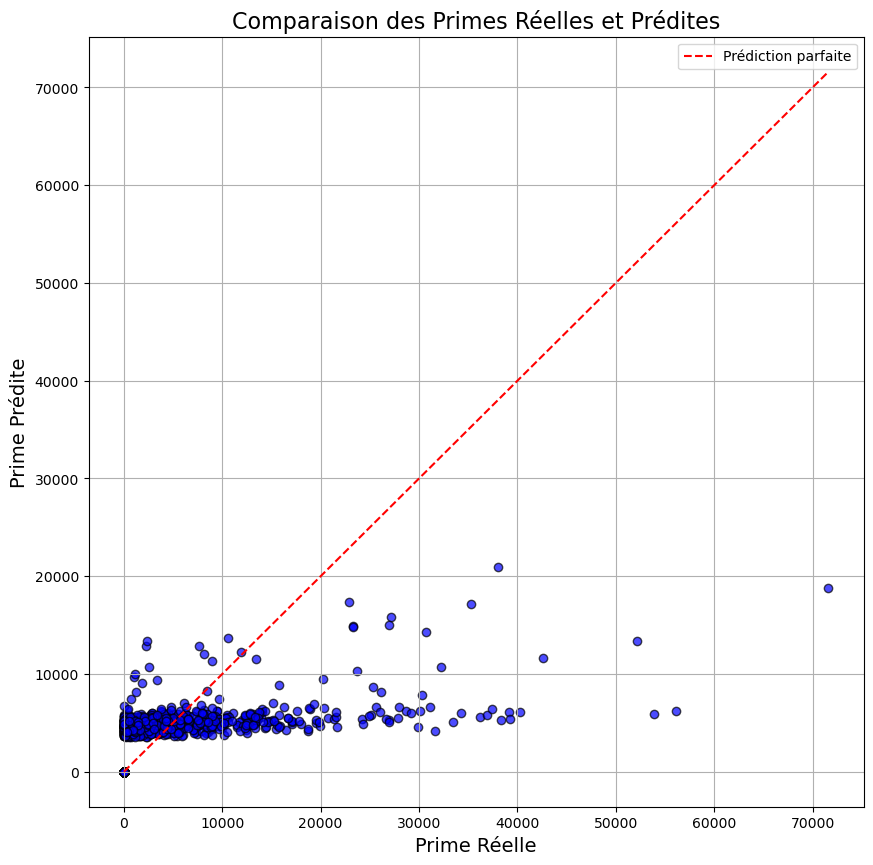

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Tracer les primes réelles contre les primes prédites
plt.scatter(comparaison_primes['Prime_Reelle'], comparaison_primes['Prime_Predite'], alpha=0.7, edgecolor='k', color='blue')

# Tracer la ligne y = x pour référence
max_prime = max(comparaison_primes['Prime_Reelle'].max(), comparaison_primes['Prime_Predite'].max())
plt.plot([0, max_prime], [0, max_prime], 'r--', label='Prédiction parfaite')

# Ajout de légendes et de titres
plt.xlabel('Prime Réelle', fontsize=14)
plt.ylabel('Prime Prédite', fontsize=14)
plt.title('Comparaison des Primes Réelles et Prédites', fontsize=16)
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()


In [103]:
#premium material 
prime_predi_mat=y_pred_rfm * y_pred_rf_grid_Ind_ppd
prime_mat  = y_test_rfm*y_test_Ind_ppd
comparaison_primes_maetrial = pd.DataFrame({
    'Prime_Reelle_mat': prime_mat,
    'Prime_Predite_mat': prime_predi_mat
})

# Affichage du DataFrame
comparaison_primes_maetrial.head(50)

,Prime_Reelle_mat,Prime_Predite_mat
38916,0.000000,0.000000
599,583.350978,733.929269
83171,0.000000,0.000000
27500,0.000000,0.000000
48832,0.000000,0.000000
11334,0.000000,0.000000
28467,0.000000,0.000000
68267,0.000000,0.000000
83717,0.000000,0.000000
16282,0.000000,0.000000


In [104]:
r2 = r2_score(prime_mat, prime_predi_mat)
print(f"Le score R² pour les prédictions de prime materiel est: {r2}")

Le score R² pour les prédictions de prime materiel est: 0.674860944304232


In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Tracer les primes réelles contre les primes prédites
plt.scatter(comparaison_primes['Prime_Reelle_mat'], comparaison_primes['Prime_Reelle_mat'], alpha=0.7, edgecolor='k', color='blue')

# Tracer la ligne y = x pour référence
max_prime = max(comparaison_primes['Prime_Reelle_mat'].max(), comparaison_primes['Prime_Predite_mat'].max())
plt.plot([0, max_prime], [0, max_prime], 'r--', label='Prédiction parfaite')

# Ajout de légendes et de titres
plt.xlabel('Prime Réelle', fontsize=14)
plt.ylabel('Prime Prédite', fontsize=14)
plt.title('Comparaison des Primes Réelles et Prédites', fontsize=16)
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

KeyError: 'Prime_Reelle_mat'

<Figure size 1000x1000 with 0 Axes>